In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your CSV
df = pd.read_csv('ecg.csv')

# Split features and labels
X = df.iloc[:, :-1].values  # all columns except last
y = df.iloc[:, -1].values   # last column is label

# Normalize ECG signals (optional but recommended)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape for 1D CNN: (samples, time steps, 1 channel)
X = X[..., np.newaxis]  # shape: (samples, signal_length, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


C:\Users\acer\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 138, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 69, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 67, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 33, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2112)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       135,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141,633 (553.25 KB)

 Trainable params: 141,633 (553.25 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9765 - loss: 0.0901 - val_accuracy: 0.9925 - val_loss: 0.0266
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9881 - loss: 0.0397 - val_accuracy: 0.9925 - val_loss: 0.0233
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9934 - loss: 0.0298 - val_accuracy: 0.9962 - val_loss: 0.0195
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9937 - loss: 0.0224 - val_accuracy: 0.9925 - val_loss: 0.0291
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9941 - loss: 0.0211 - val_accuracy: 0.9950 - val_loss: 0.0180
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9962 - loss: 0.0149 - val_accuracy: 0.9937 - val_loss: 0.0226
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9959 - loss: 0.0153 - val_accuracy: 0.9937 - val_loss: 0.0229
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9956 - loss: 0.0147 - val_accuracy: 0

In [6]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9860 - loss: 0.0957
Test accuracy: 0.99


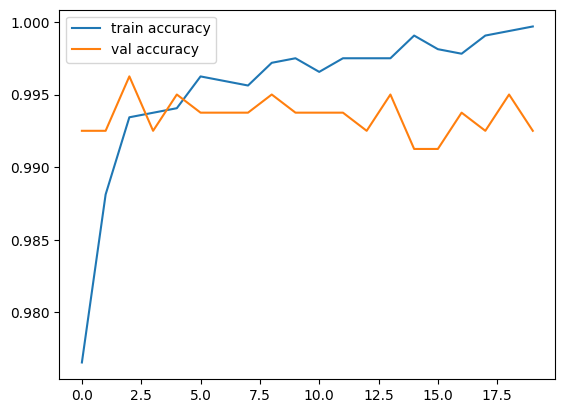

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()


In [20]:
# Load new data (e.g., from CSV) – same format as before (without label column)
new_df = pd.read_csv("ecg_test.csv", header=None)

# Normalize (same scaler as used during training)
new_X = scaler.transform(new_df.values)

# Reshape to match CNN input shape
new_X = new_X[..., np.newaxis]  # shape: (samples, signal_length, 1)

# Predict
predictions = model.predict(new_X)

# Convert probabilities to 0 or 1
predicted_labels = (predictions > 0.5).astype(int)

# Show predictions
for i, p in enumerate(predicted_labels):
    print(f"ECG {i+1}: {'Abnormal' if p[0] == 1 else 'Normal'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
ECG 1: Abnormal
ECG 2: Normal
ECG 3: Abnormal
